# Using Python Wrappers

A quick example to use python to read in three-column photometry files, model files and TTVs and then do a transit model fit to the data.  

Currently there are binds for the transitfit5 tool suite.  Go into the transitfit5/utils directory and use f2py to build the python modules:  

    f2py3.5 --fcompiler=intelem -c tfit5.pyf transitmodel.f keplerian.f ttcor.f occultquad.f mandelagol.f rqsort.f transitdur.f  
    f2py3.5 --fcompiler=intelem -c fittransitmodel3.pyf precision.f90 fittermod.f90 fittransitmodel3.f90 getrhosig.f minpack.f  
  
This will create two .so files that you can move into the example directory, then the code below should work.

In [1]:
#Import module
import transitfit5 as tf #import transitfit5 modules
%matplotlib inline

Simple 1 planet model:

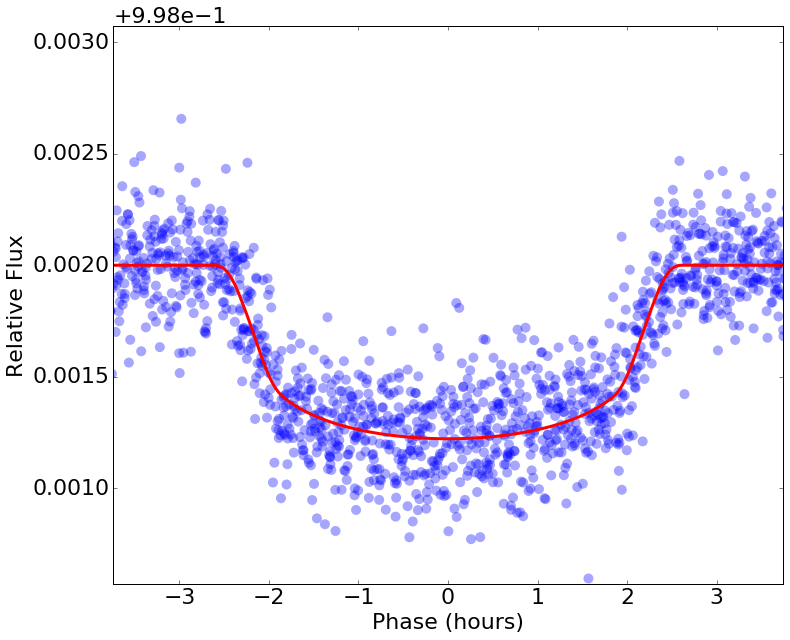

In [5]:
time,flux,ferr = tf.readphotometry("tremove.1.dat") #read in photometry from text file
sol,serr=tf.readsol("n1.dat") #read in a transit solution
#tmodel=tf.transitmodel(sol,time) #how to get a copy of the transit model
sol2=tf.fittrmodel(time,flux,ferr,sol,serr) #fitting a transit
tf.transitplot(time,flux,sol2,nplanetplot=1) #plot the phase and model

One planet model with TTVs

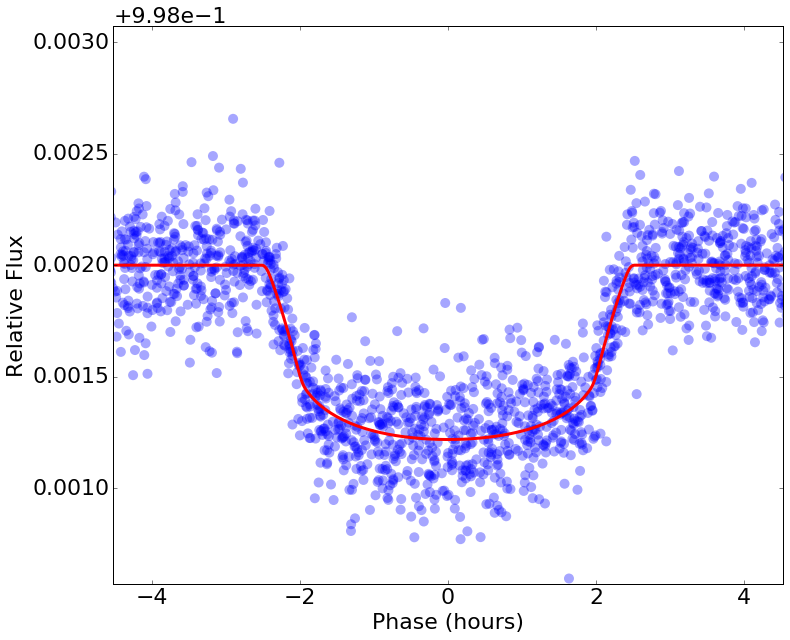

In [6]:
time,flux,ferr = tf.readphotometry("tremove.1.dat") #read in photometry from text file
sol,serr=tf.readsol("n1.dat") #read in a transit solution
ntt,tobs,omc = tf.readtt('ttv/koi0157.01.tt')
sol2=tf.fittrmodel(time,flux,ferr,sol,serr,ntt=ntt,tobs=tobs,omc=omc) #fitting a transit
tf.transitplot(time,flux,sol2,nplanetplot=1,ntt=ntt,tobs=tobs,omc=omc) #plot the phase and model

Multiplanet (6) Planet Model Example - There are 6 planets, so the code can take about 10-20 minutes to run.

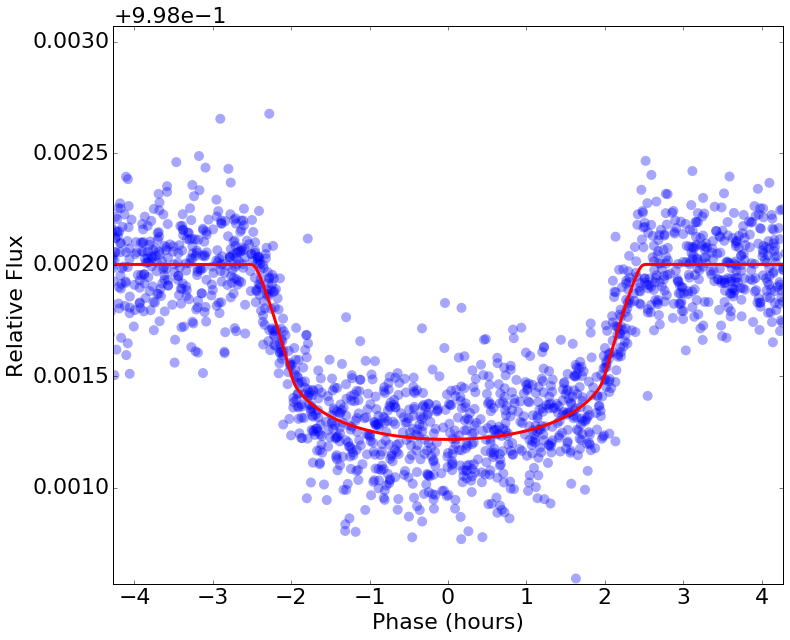

In [7]:
time,flux,ferr = tf.readphotometry("klc06541920.dct.dat") #read in photometry from text file
sol,serr=tf.readsol("n0.dat") #read in a transit solution
ntt,tobs,omc = tf.readtt('ttv/koi0157.01.tt','ttv/koi0157.02.tt','ttv/koi0157.03.tt', \
 'ttv/koi0157.04.tt','ttv/koi0157.05.tt','ttv/koi0157.06.tt') #read in TTVs
#tmodel=tf.transitmodel(sol,time,ntt=ntt,tobs=tobs,omc=omc) #get the transit model
sol2=tf.fittrmodel(time,flux,ferr,sol,serr,ntt=ntt,tobs=tobs,omc=omc) #fitting a transit
tf.transitplot(time,flux,sol2,nplanetplot=1,ntt=ntt,tobs=tobs,omc=omc) #plot the phase and model